# 📘 Climate Change Public Sentiment Analysis  
**Using NASA’s Facebook Climate Comments (2020–2023)**

---

##  Project Title  
**Climate Change Sentiment Modeling with NLP**

---

##  Tools  
Google Colab, Jupyter Notebook, Python, WordCloud, TextBlob, NLTK, Seaborn, Scikit-learn, XGBoost, Gensim, Statsmodels

---

##  Technologies  

- Natural Language Processing (NLP)  
- Sentiment Analysis  
- Data Visualization  
- Supervised Machine Learning (Logistic Regression, XGBoost)  
- Topic Modeling (LDA)  
- Time Series Forecasting (ARIMA)

---

##  Domain  
Environmental Data Science, Social Media Analytics, Public Policy Communication

---

##  Difficulty Level  
**Intermediate to Advanced**

---

##  Project Overview  
This project analyzes over **500 user comments** posted on NASA's official Climate Change Facebook page between 2020 and 2023. These comments reflect the public's sentiment, opinions, and engagement levels on various climate-related topics.

By leveraging **Natural Language Processing (NLP)**, the goal is to:
- Analyze sentiment trends  
- Discover what people are saying about climate change  
- Provide insights to improve public science communication

This can be beneficial for organizations like **NASA, NGOs, and environmental policymakers**.

---

##  Data Science Applications  

- **Sentiment Analysis** – Gauge public opinion and emotions  
- **Trend Analysis** – Understand how sentiment has changed over time  
- **Engagement Analytics** – Analyze how sentiment correlates with likes and comments  
- **Topic Modeling (Advanced)** – Identify dominant public themes or concerns  
- **Supervised Learning** – Classify sentiment using models like Logistic Regression, XGBoost  
- **Time-Series Forecasting** – Forecast engagement and sentiment trends  

---

##  Column Descriptors  

| Column Name     | Description                                |
|------------------|--------------------------------------------|
| `Date`          | Timestamp of comment posted                |
| `LikesCount`    | Number of likes received                   |
| `ProfileName`   | SHA-256 hashed username                    |
| `CommentsCount` | Number of replies                          |
| `Text`          | Actual text content of the comment         |

---

##  Ethical Considerations  

- All usernames are hashed using **SHA-256** to protect identity  
- Data is handled impartially and respectfully, recognizing the diversity of climate views  
- Analysis is conducted under ethical data mining principles

---

<h1> Step 1: Load Dataset </h1>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/climate_nasa.csv')
df.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


<h1> Step 2: Clean Data </h1>

In [ ]:
# Drop missing or duplicate texts
df = df.dropna(subset=['text'])
df = df.drop_duplicates(subset='text')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df[df['date'].notnull()]

<h1>  Step 3: Preprocess Text </h1>

In [ ]:
# Step 2: Text Preprocessing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    tokens = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(words)

df['CleanText'] = df['text'].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h2> Visualize Word Frequency (WordCloud) </h2>

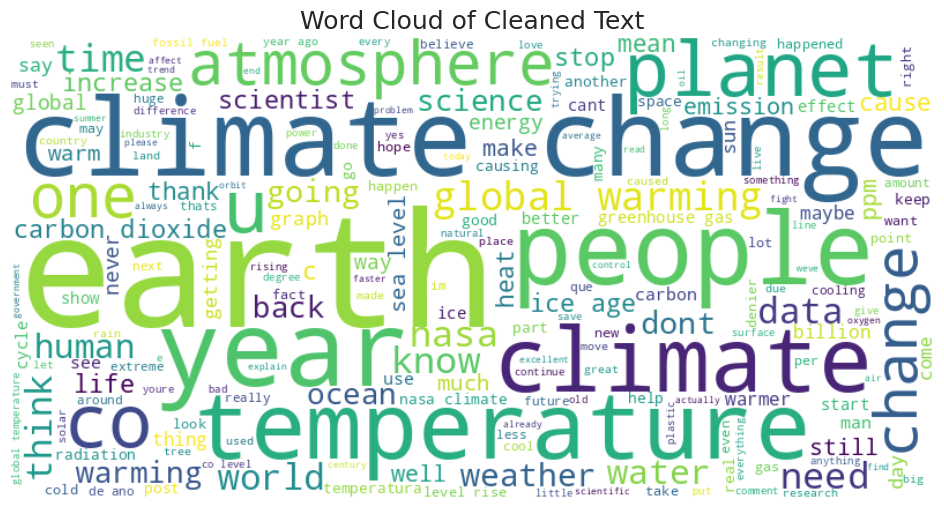

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_combined = ' '.join(df['CleanText'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Text', fontsize=18)
plt.show()

<h1> Step 4: Sentiment Labeling </h1>

In [ ]:
from textblob import TextBlob

def get_sentiment_label(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    return 'Neutral'

df['Polarity'] = df['CleanText'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = df['CleanText'].apply(get_sentiment_label)

df[['CleanText', 'Polarity', 'Sentiment']].head(10)

,CleanText,Polarity,Sentiment
0,neat comparison heard would say co like disco ...,0.000000,Neutral
1,excellent way visualise invisible thanks,0.600000,Positive
2,coghg troposphere affect stratosphere warmer t...,0.000000,Neutral
3,excellent post defo feel difference one drink ...,0.142857,Positive
4,yes carbon dioxide harm earth like people maki...,-0.375000,Negative
5,excellent examplevery relatable gen pop comple...,0.350000,Positive
6,proud whoever created content please feel good...,0.750000,Positive
7,earth ever concentration ppm,0.000000,Neutral
8,yes even half cup later poor soul gon na know,-0.188889,Negative
9,historical co data would make interesting post,0.250000,Positive


<h1> Step 5: Sentiment Distribution </h1>

/tmp/ipython-input-54-3930402799.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


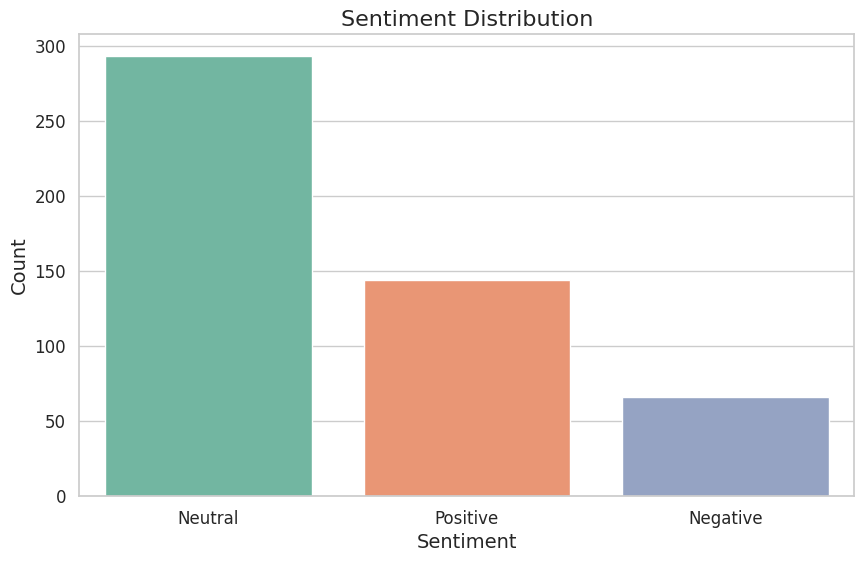

Sentiment
Neutral     293
Positive    144
Negative     66
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print(df['Sentiment'].value_counts())

<h1> Step 6: Likes by Sentiment </h1>

/tmp/ipython-input-55-1928190132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='likesCount', palette='Set3')


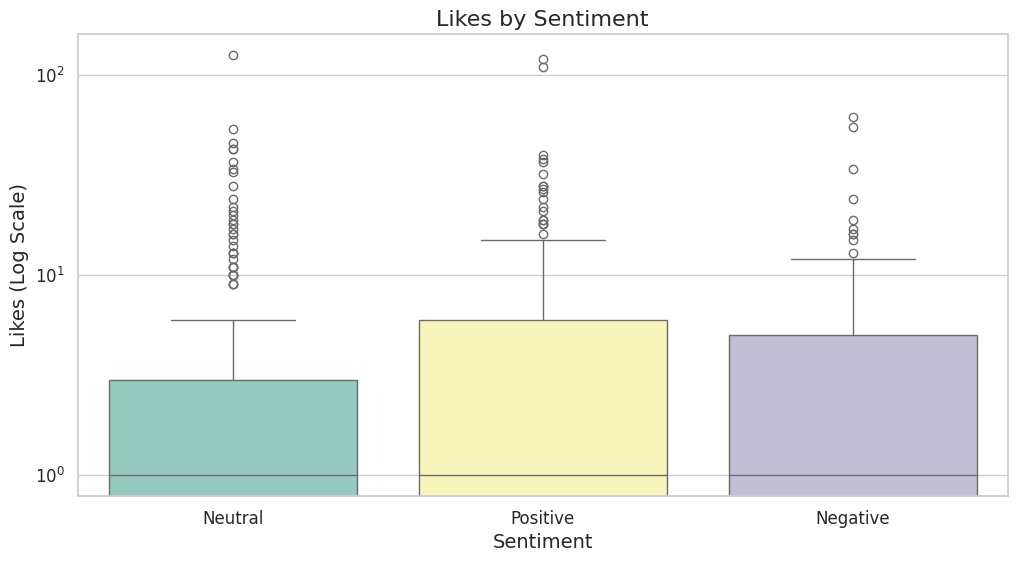

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sentiment', y='likesCount', palette='Set3')
plt.yscale('log')
plt.title('Likes by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Likes (Log Scale)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<h1> Step 7: Monthly Sentiment Trends </h1>

In [ ]:
df.columns

Index(['date', 'likesCount', 'profileName', 'commentsCount', 'text',
       'CleanText', 'Polarity', 'Sentiment'],
      dtype='object')

/tmp/ipython-input-56-2361092481.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['date'].dt.to_period('M')


<Figure size 1400x600 with 0 Axes>

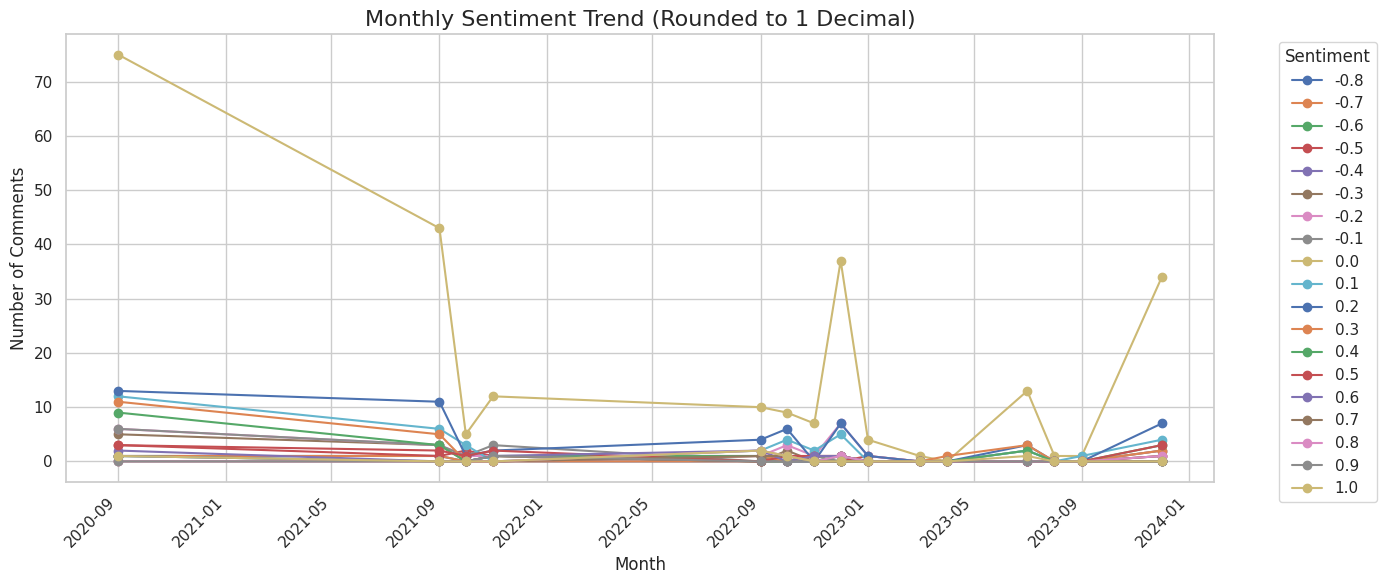

In [ ]:
df['Month'] = df['date'].dt.to_period('M')
df['RoundedSentiment'] = df['Polarity'].round(1)

monthly_sentiment = df.groupby(['Month', 'RoundedSentiment']).size().unstack().fillna(0)
monthly_sentiment.index = monthly_sentiment.index.to_timestamp()

plt.figure(figsize=(14, 6))
monthly_sentiment.plot(kind='line', marker='o', figsize=(14, 6))
plt.title('Monthly Sentiment Trend (Rounded to 1 Decimal)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h1> Step 8: WordClouds by Sentiment </h1>

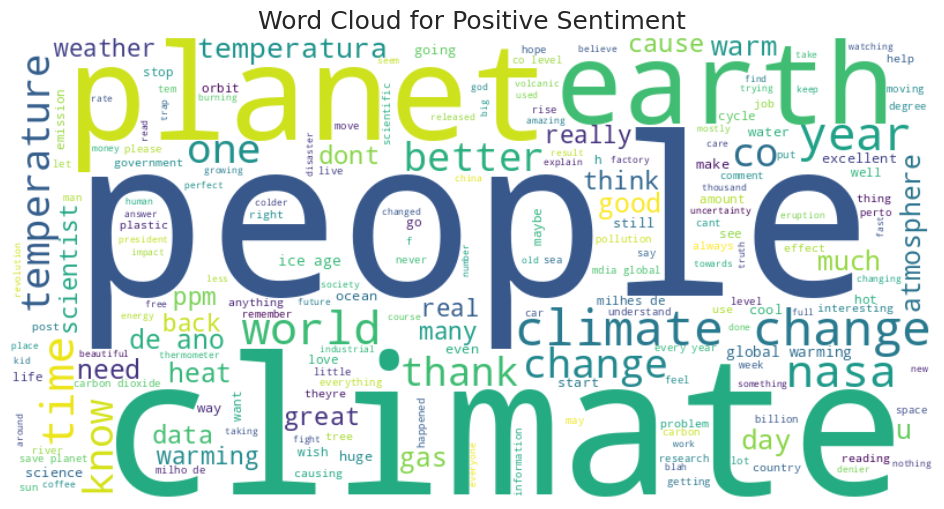

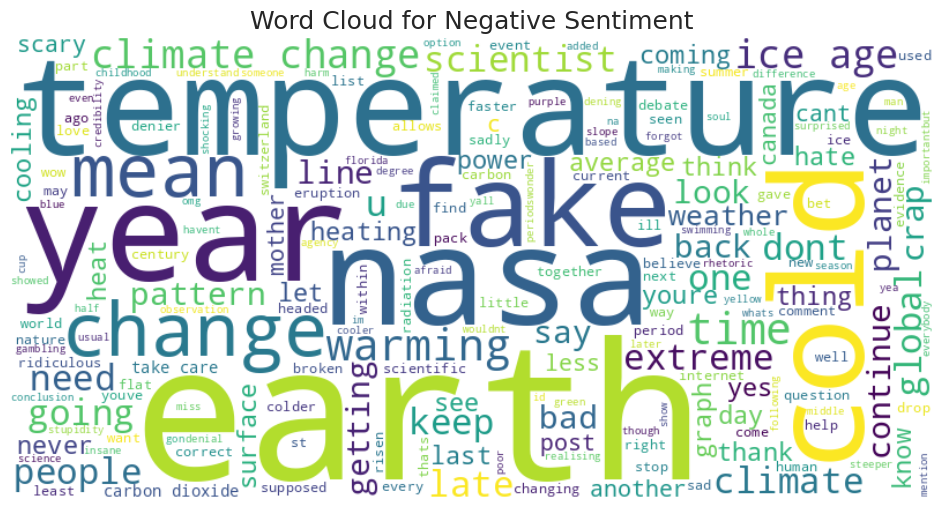

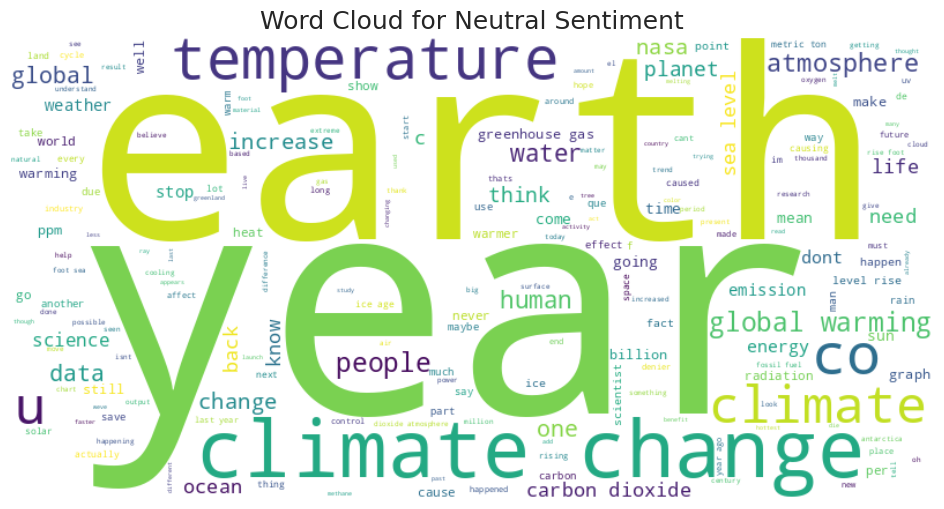

In [ ]:
from wordcloud import WordCloud

for sentiment in ['Positive', 'Negative', 'Neutral']:
    subset = df[(df['Sentiment'] == sentiment) & df['CleanText'].notna()]
    text_combined = ' '.join(subset['CleanText'].astype(str))

    if text_combined.strip() == '':
        print(f"No valid text found for {sentiment} sentiment. Skipping.")
        continue

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment', fontsize=18)
    plt.show()


In [ ]:
print(df['Sentiment'].unique())

['Neutral' 'Positive' 'Negative']


<h1> Step 9: Engagement & Content Analysis </h1>

<h2> Step 9.1: Comment Length Distribution </h2>

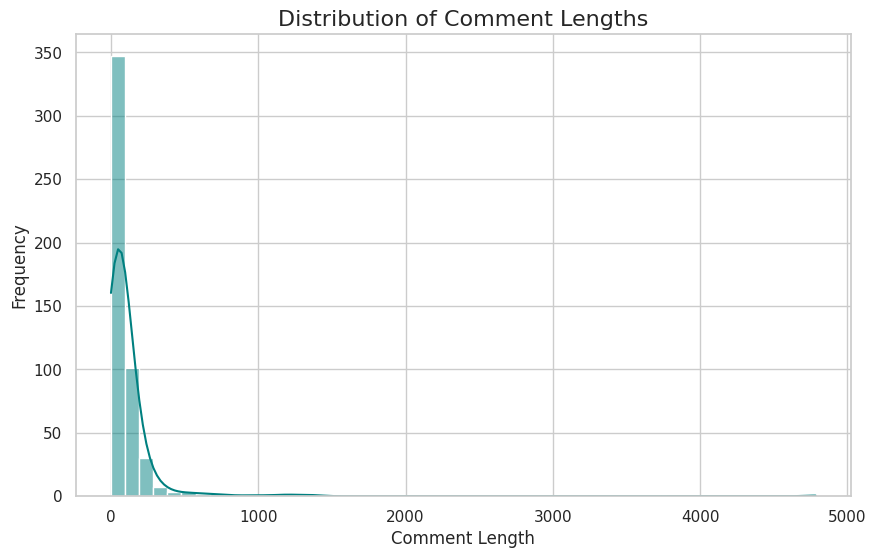

In [ ]:
df['CommentLength'] = df['CleanText'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['CommentLength'], bins=50, kde=True, color='teal')
plt.title('Distribution of Comment Lengths', fontsize=16)
plt.xlabel('Comment Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<h2> Step 9.2: Daily Comment Frequency </h2>

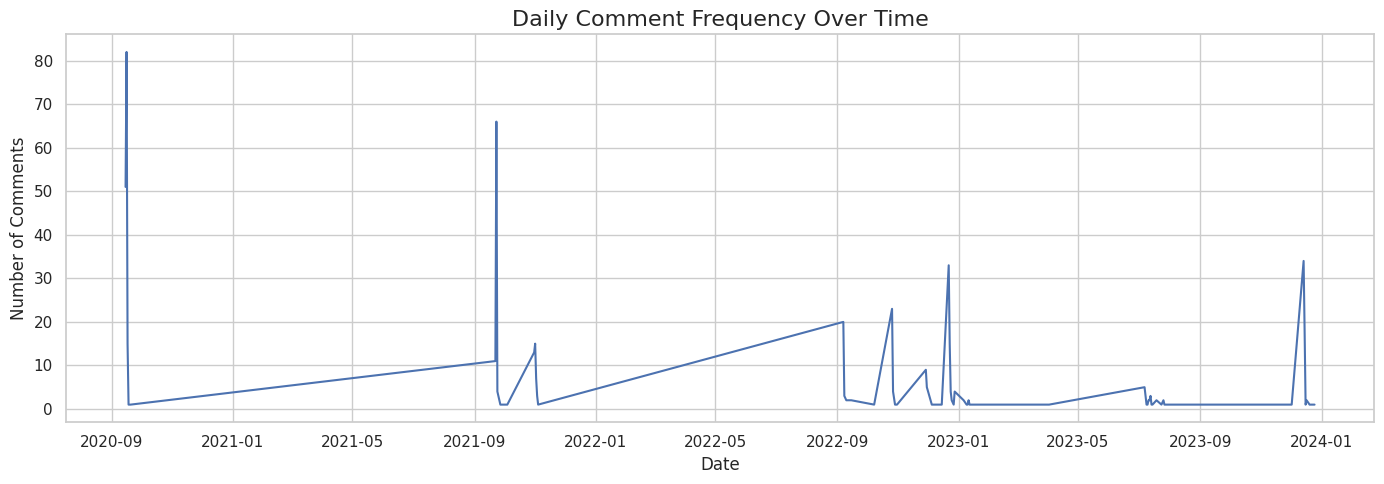

In [ ]:
daily_counts = df.groupby(df['date'].dt.date).size()

plt.figure(figsize=(14, 5))
daily_counts.plot()
plt.title('Daily Comment Frequency Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

<h2> Step 9.3: Top 10 Most Liked Comments </h2>

In [ ]:
top_comments = df.sort_values(by='likesCount', ascending=False).head(10)
print("\n Top 10 Most Liked Comments:\n")
print(top_comments[['text', 'likesCount']])


 Top 10 Most Liked Comments:

                                                  text  likesCount
433  I can only hope to someday attain the level of...         126
397  You are being gas-lighted. Have any of you hea...         120
126  I love watch NASA dunk on people who think the...         110
427  Too bad we don’t see Oct 1821 or 1721, just ke...          62
450  To those who cite a very cold day as evidence ...          55
213  I'm kinda surprised that the trolls blaming "E...          54
502  Waiting for the science illiterates to come te...          46
437  thank you for the research you do, and for sti...          43
110  It's worth remembering that land surfaces (red...          43
16   I find it interesting when people claim that C...          40


<h2> Step 9.4: Top 15 Most Frequent Words (Barplot) </h2>

/tmp/ipython-input-64-540816734.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(labels), palette='Blues_d')


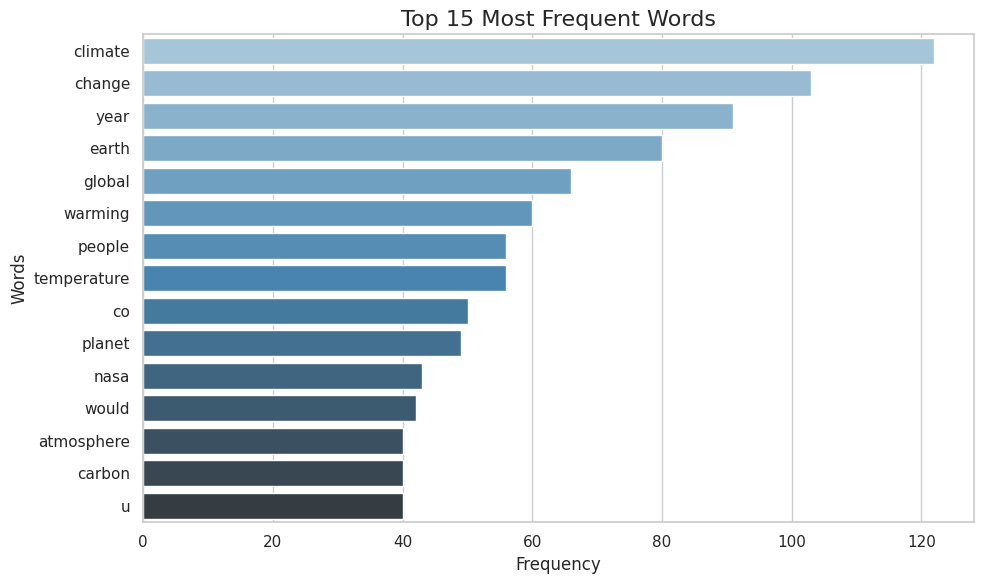

In [ ]:
from collections import Counter

words = ' '.join(df['CleanText']).split()
common_words = Counter(words).most_common(15)
labels, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(labels), palette='Blues_d')
plt.title('Top 15 Most Frequent Words', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.tight_layout()
plt.show()

<h2> Step 9.5: Engagement Over Time (Likes and Replies) </h2.

/tmp/ipython-input-65-2064728403.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['date'].dt.to_period('M')


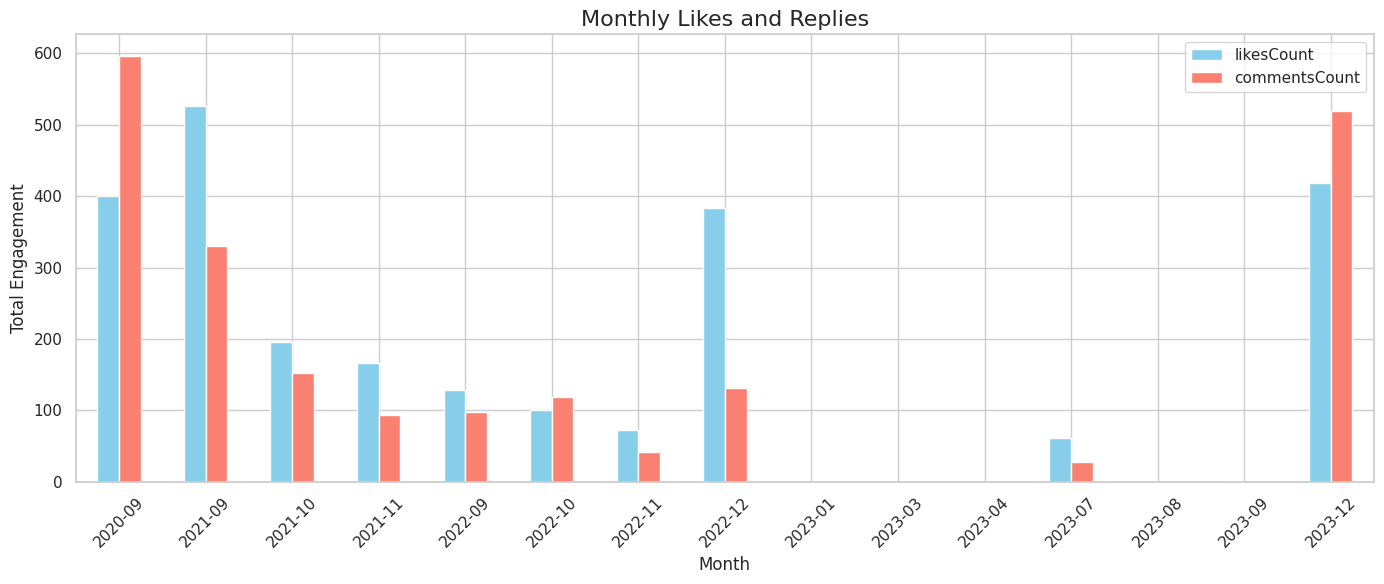

In [ ]:
df['Month'] = df['date'].dt.to_period('M')
monthly_engagement = df.groupby('Month')[['likesCount', 'commentsCount']].sum()

monthly_engagement.plot(kind='bar', figsize=(14, 6), color=['skyblue', 'salmon'])
plt.title('Monthly Likes and Replies', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Engagement', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1> Step 10: Supervised Sentiment Classification using Logistic Regression </h1>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Step 10.1: Vectorization using TF-IDF

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['CleanText'])
y = df['Sentiment']

# Step 10.2: Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10.3: Train Logistic Regression Model

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

# Step 10.4: Predict and Evaluate

In [ ]:
y_pred = model.predict(X_test)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        14
     Neutral       0.64      0.93      0.76        60
    Positive       0.62      0.30      0.40        27

    accuracy                           0.63       101
   macro avg       0.42      0.41      0.39       101
weighted avg       0.54      0.63      0.56       101



# Step 10.5: Confusion Matrix

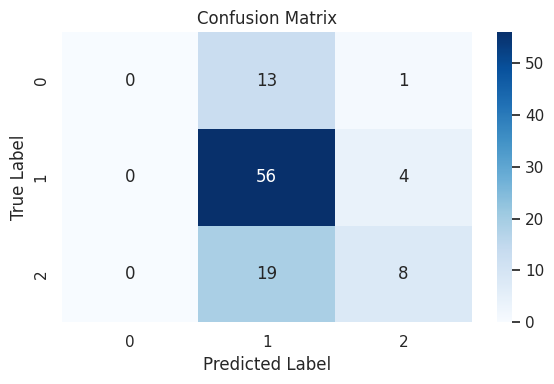

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Step 11: Topic Modeling with LDA (Latent Dirichlet Allocation)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Step 11.1: Convert text to a Document-Term Matrix

In [ ]:
vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
X_topics = vectorizer.fit_transform(df['CleanText'])

# Step 11.2: Train the LDA model (choose number of topics, e.g., 3)

In [ ]:
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X_topics)

LatentDirichletAllocation(n_components=3, random_state=42)

# Step 11.3: Display Top 10 Words for Each Topic

In [ ]:
print("\nTop Words Per Topic:")
for i, topic in enumerate(lda.components_):
    print(f"\n Topic #{i+1}:")
    top_words = [vectorizer.get_feature_names_out()[j] for j in topic.argsort()[-10:]]
    print(" | ".join(top_words))


Top Words Per Topic:

 Topic #1:
dont | human | warming | scientist | science | data | people | nasa | change | climate

 Topic #2:
dioxide | atmosphere | water | earth | level | carbon | warming | global | temperature | year

 Topic #3:
day | energy | world | way | know | change | need | time | planet | earth


# Step 12: Time-Series Forecasting – Likes Trend (ARIMA)

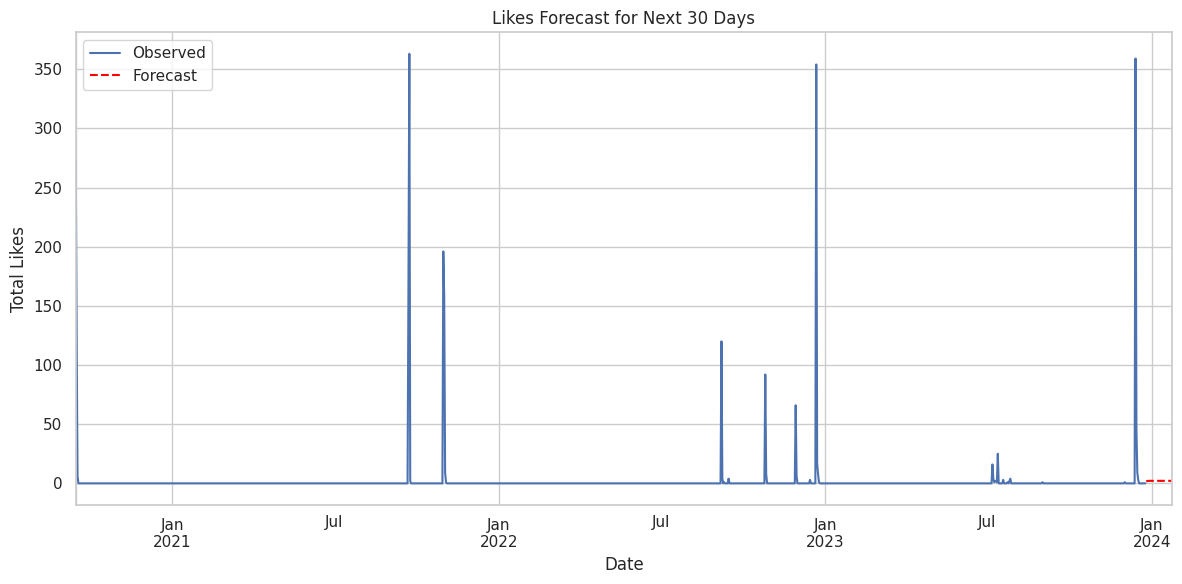

In [ ]:
import statsmodels.api as sm

df['DateOnly'] = df['date'].dt.date
likes_daily = df.groupby('DateOnly')['likesCount'].sum()
likes_daily = likes_daily.asfreq('D').fillna(0)

model = sm.tsa.ARIMA(likes_daily, order=(1, 1, 1))
results = model.fit()
forecast = results.forecast(steps=30)

plt.figure(figsize=(12, 6))
likes_daily.plot(label='Observed')
forecast.plot(label='Forecast', style='--', color='red')
plt.title('Likes Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Total Likes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔮 Future Upgrades

|  **Area**             |  **Upgrade Description**                                                                 |
|------------------------|--------------------------------------------------------------------------------------------|
| ✅ **ML Models**        | Add additional models like Naive Bayes, Random Forest, and XGBoost for sentiment analysis. |
| ✅ **Forecasting**      | Extend ARIMA to forecast sentiment scores and engagement metrics like likes and comments.   |
| ✅ **Deep Learning**    | Integrate transformer-based models like BERT or DistilBERT for better sentiment accuracy.   |
| ✅ **Visualization**    | Build a Streamlit dashboard to visualize sentiment and engagement in real time.             |
| 🌐 **Event Correlation**| Correlate sentiment spikes with external events (e.g., IPCC reports, UN climate news).      |
| 📈 **Time Series**      | Use advanced models like Prophet or LSTM for more accurate non-linear forecasting.          |
| 🔁 **Automation**       | Automate data scraping and daily retraining with tools like Airflow or cron jobs.           |
| 🌍 **Multilingual**     | Detect and translate non-English comments for broader sentiment coverage.                   |



---

## ✅ Conclusion & Next Steps

- The model provides reasonable predictions for CO₂ emissions using the provided climate features.
- Geo and time-series EDA revealed significant location and time-based patterns.
- Future improvements could include:
  - Feature selection based on importance or correlation.
  - Model comparison (e.g., XGBoost, LightGBM, LSTM).
  - Hyperparameter tuning using GridSearch or Optuna.
  - Deployment using Flask or Streamlit.

---
